In [1]:
import modin.pandas as pd
from Functions import *
from Telescope import *
import Ariel

import time

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

________________________________________________________________
Opening all instruments into dictionary object 'instruments'...

Ariel
  |--> Ariel_MCS_Known_2024-03-27
             |--> Ariel AIRS CH0 1.95-3.9um D=1 R=100 tau=0.18
             |--> Ariel AIRS CH0 1.95-3.9um D=1 R=3 tau=0.18
             |--> Ariel AIRS CH0 1.95-3.9um D=1 R=30 tau=0.18
             |--> Ariel AIRS CH0 1.95-3.9um D=1 R=50 tau=0.18
             |--> Ariel AIRS CH1 3.9-7.8um D=1 R=1 tau=0.18
             |--> Ariel AIRS CH1 3.9-7.8um D=1 R=10 tau=0.18
             |--> Ariel AIRS CH1 3.9-7.8um D=1 R=100 tau=0.18
             |--> Ariel AIRS CH1 3.9-7.8um D=1 R=3 tau=0.18
             |--> Ariel AIRS CH1 3.9-7.8um D=1 R=30 tau=0.18
             |--> Ariel FGS1 0.6-0.8um D=1 R=1 tau=0.17
             |--> Ariel FGS2 0.8-1.1um D=1 R=1 tau=0.25
             |--> Ariel NIRSpec 1.1-1.95um D=1 R=1 tau=0.27
             |--> Ariel NIRSpec 1.1-1.95um D=1 R=10 tau=0.27
             |--> Ariel NIRSpec 1.1-1.95um D=

In [11]:
%%timeit

# sorted(Ariel.instruments["Ariel"][Ariel.target_list_name].keys(), key=str.lower)
Ariel.getInstrument("AIRS CH0 R=100")

43.9 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
after = 43.9e-6 #s (+- 200e-9s)
before = 0.265 #s (+- 0.0453ms)

print("Improvement: ", before/after)
print("Time saved: ", before - after, "\bs")
print("Detriment: ", after/before)

Improvement:  6036.446469248292
Time saved:  0.2649561s
Detriment:  0.00016566037735849058


In [2]:
getTelescope("Ariel AIRS CH0 1.95-3.9um D=1 R=100 tau=0.18", "Ariel_MCS_Known_2024-03-27")

In [26]:
ch0 = full_dict["Ariel"]['Ariel_MCS_Known_2024-03-27']['Ariel AIRS CH0 1.95-3.9um D=1 R=3 tau=0.18']

In [27]:
full_dict["Ariel"]["Ariel_MCS_Known_2024-03-27"]

{'Ariel AIRS CH0 1.95-3.9um D=1 R=3 tau=0.18': <Telescope.Telescope at 0x1e3cb2c4710>,
 'Ariel NIRSpec 1.1-1.95um D=1 R=1 tau=0.27': <Telescope.Telescope at 0x1e3cb2ef750>}

## General ExoEcho results

In [2]:
## to create data or load it!
load_data = False

In [3]:
target_list = Ariel.getInstrument("CH0 R=100").target_list    
target_list.head(3)

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,277.0,540.0,Transit,4.0,44.0,88.0,0,0,0,1
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,118.0,233.0,Transit,1.0,11.0,21.0,0,0,0,2
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,22187.0,56322.0,Transit,1.0,5.0,9.0,0,0,0,2


In [24]:
if not load_data:
    start_time = time.time()
    for i in range(1,4):
        tier_time_start = time.time()
        print(f"starting tier {i}")
        
        for param in ["ESM", "TSM", "RSM", "Full Phase Curve SNR"]:
            snr_time_start = time.time()
            print(f"---- starting {param}", end=" ")
            if param == "Full Phase Curve SNR":
                avg_SNR = 10
            else:
                avg_SNR = 7
            target_list[[f"Tier {i} Observations {param}", f"Tier {i} SNR {param}"]] = pd.DataFrame([Ariel.findTierObservations(x["Planet Name"], i, param, avg_SNR) for _, x in target_list.iterrows()], columns=[f"Tier {i} Observations {param}", f"Tier {i} SNR {param}"])
            
            snr_time_end = time.time()
            print(f" -- {snr_time_end - snr_time_start:.2f} seconds --")
        
        tier_time_end = time.time()
        print(f"     ---> tier {i} took {tier_time_end - tier_time_start:.2f} seconds", end="\n\n")

    # saving target list
    target_list.to_csv("Ariel_Target_List.csv", index=False)
    
    
    end_time = time.time()
    print(f"\n-> total time: {end_time - start_time:.2f} seconds", end="\n\n")
    
else:
    target_list = pd.read_csv("Ariel_Target_List.csv")

starting tier 1
---- starting ESM  -- 8.73 seconds --
---- starting TSM  -- 8.71 seconds --
---- starting RSM  -- 8.61 seconds --
---- starting Full Phase Curve SNR  -- 8.50 seconds --
     ---> tier 1 took 34.54 seconds

starting tier 2
---- starting ESM  -- 9.43 seconds --
---- starting TSM  -- 9.33 seconds --
---- starting RSM  -- 8.64 seconds --
---- starting Full Phase Curve SNR  -- 9.38 seconds --
     ---> tier 2 took 36.79 seconds

starting tier 3
---- starting ESM  -- 10.30 seconds --
---- starting TSM  -- 10.40 seconds --
---- starting RSM  -- 8.59 seconds --
---- starting Full Phase Curve SNR  -- 10.75 seconds --
     ---> tier 3 took 40.05 seconds


-> total time: 111.52 seconds



In [23]:
from parallel_pandas import ParallelPandas

ParallelPandas.initialize(n_cpu=16, split_factor=1, disable_pr_bar=True)

if not load_data:
    start_time = time.time()
    for i in range(1,4):
        tier_time_start = time.time()
        print(f"starting tier {i}")
        
        for param in ["ESM", "TSM", "RSM", "Full Phase Curve SNR"]:
            snr_time_start = time.time()
            print(f"---- starting {param}", end=" ")
            if param == "Full Phase Curve SNR":
                avg_SNR = 10
            else:
                avg_SNR = 7
            target_list[[f"Tier {i} Observations {param}", f"Tier {i} SNR {param}"]]  = target_list.apply(lambda x: pd.Series(Ariel.findTierObservations(x["Planet Name"], 
                                                                                                                i, 
                                                                                                                param, 
                                                                                                                avg_SNR)),
                                                                            axis=1)
            
            snr_time_end = time.time()
            print(f" -- {snr_time_end - snr_time_start:.2f} seconds --")
        
        tier_time_end = time.time()
        print(f"     ---> tier {i} took {tier_time_end - tier_time_start:.2f} seconds", end="\n\n")

    # saving target list
    target_list.to_csv("Ariel_Target_List.csv", index=False)
    
    
    end_time = time.time()
    print(f"\n-> total time: {end_time - start_time:.2f} seconds", end="\n\n")
    
else:
    target_list = pd.read_csv("Ariel_Target_List.csv")

starting tier 1
---- starting ESM  -- 8.52 seconds --
---- starting TSM  -- 9.28 seconds --
---- starting RSM  -- 8.84 seconds --
---- starting Full Phase Curve SNR  -- 9.14 seconds --
     ---> tier 1 took 35.78 seconds

starting tier 2
---- starting ESM  -- 9.15 seconds --
---- starting TSM  -- 9.14 seconds --
---- starting RSM  -- 8.39 seconds --
---- starting Full Phase Curve SNR  -- 10.03 seconds --
     ---> tier 2 took 36.71 seconds

starting tier 3
---- starting ESM  -- 11.29 seconds --
---- starting TSM  -- 10.10 seconds --
---- starting RSM  -- 8.48 seconds --
---- starting Full Phase Curve SNR  -- 10.18 seconds --
     ---> tier 3 took 40.05 seconds


-> total time: 112.69 seconds



In [25]:
target_list["Preferred Observation ExoEcho"] = None
for i, _ in target_list.iterrows():
    preferred_method = ["ESM", target_list['Tier 1 Observations ESM'].iloc[i]]
    for param in ["TSM", "RSM"]:
        num_observations = target_list[f"Tier 1 Observations {param}"].iloc[i]
        if num_observations < preferred_method[1]:
            preferred_method = [param, num_observations]
        elif num_observations == preferred_method[1]:
            preferred_method[0] += f" {param}"
            
    target_list["Preferred Observation ExoEcho"].iloc[i] = preferred_method[0].replace("ESM", "Emission").replace("TSM", "Transmission").replace("RSM", "Reflected Light")

In [26]:
target_list["Preferred Observation ExoEcho"][target_list["Preferred Observation ExoEcho"].str.contains("Emission")].count()

353

In [27]:
target_list

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 SNR Full Phase Curve SNR,Tier 3 Observations ESM,Tier 3 SNR ESM,Tier 3 Observations TSM,Tier 3 SNR TSM,Tier 3 Observations RSM,Tier 3 SNR RSM,Tier 3 Observations Full Phase Curve SNR,Tier 3 SNR Full Phase Curve SNR,Preferred Observation ExoEcho
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,10.001158,2202.0,7.000162,43.0,7.054779,5906.0,7.000410,440.0,10.008655,Transmission
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,10.040206,993.0,7.000901,7.0,7.041787,1835.0,7.000134,205.0,10.005534,Transmission
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,10.000831,803100.0,7.000004,12.0,7.180927,683528.0,7.000004,6362.0,10.000613,Transmission
3,WASP-176,1.34,-0.13,0.08,5941.0,-79.0,77.0,1.93,-0.04,0.05,...,11.972115,15.0,7.118259,26.0,7.033892,33.0,7.064594,5.0,10.914782,Emission Transmission
4,TOI-1801,0.56,-0.04,0.04,3863.0,-77.0,77.0,0.55,-0.02,0.03,...,10.000401,171158.0,7.000008,33.0,7.053460,216907.0,7.000002,12912.0,10.000107,Transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,TOI-1693,0.49,-0.03,0.03,3499.0,-70.0,70.0,0.46,-0.01,0.01,...,10.002308,9715.0,7.000204,48.0,7.007714,17092.0,7.000086,3724.0,10.000628,Transmission
693,NGTS-8,0.89,-0.04,0.05,5241.0,-50.0,50.0,0.98,-0.02,0.02,...,10.587772,59.0,7.023119,126.0,7.006618,149.0,7.003413,14.0,10.068737,Emission
694,K2-405,1.03,-0.31,0.46,4927.0,-138.0,138.0,0.77,-0.05,0.05,...,10.124929,228.0,7.002993,28.0,7.083702,466.0,7.003798,50.0,10.059427,Transmission
695,TOI-532,0.64,-0.02,0.02,3927.0,-37.0,37.0,0.61,-0.01,0.01,...,10.018637,962.0,7.002409,113.0,7.023262,1979.0,7.001214,169.0,10.011688,Transmission


In [28]:
# prepping colours

esm_colour = "red"
tsm_colour = "green"
rsm_colour = "orange"

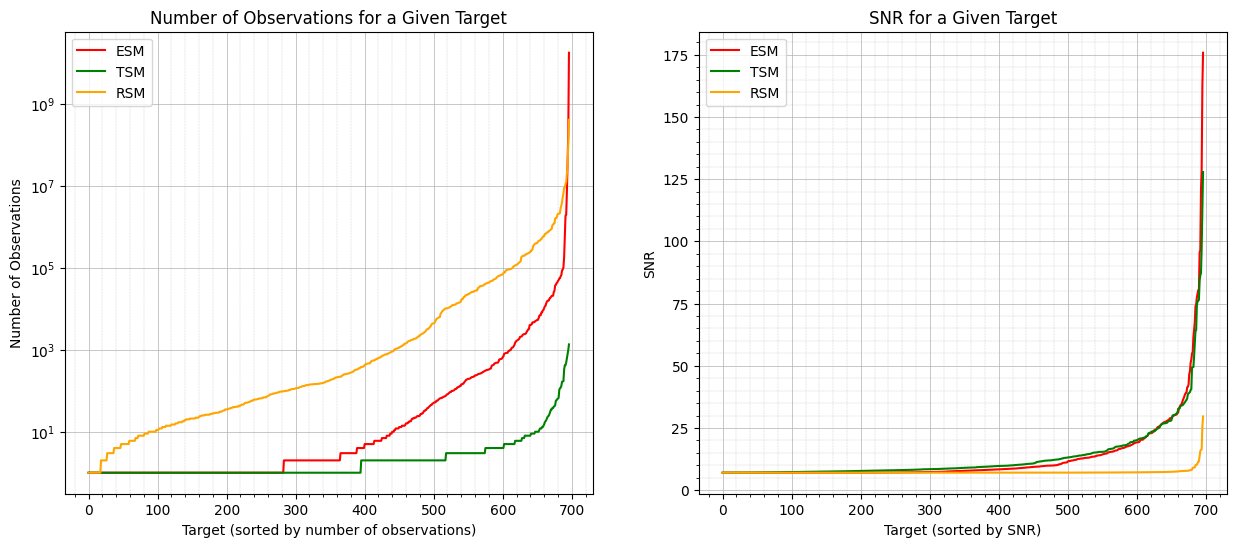

In [29]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(15,6))

ax.plot(range(0, len(target_list)), target_list["Tier 1 Observations ESM"].sort_values(), label="ESM", color=esm_colour)
ax.plot(range(0, len(target_list)), target_list["Tier 1 Observations TSM"].sort_values(), label="TSM", color=tsm_colour)
ax.plot(range(0, len(target_list)), target_list["Tier 1 Observations RSM"].sort_values(), label="RSM", color=rsm_colour)

ax.set_ylabel("Number of Observations")
ax.set_xlabel("Target (sorted by number of observations)")

ax.set_yscale('log')
ax.set_title("Number of Observations for a Given Target")

# ax.set_xlim(0, 1000)

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle='-.', linewidth='0.2')
ax.minorticks_on()

ax.legend()


####-----#####
ax1.plot(range(0, len(target_list)), target_list["Tier 1 SNR ESM"].sort_values(), label="ESM", color=esm_colour)
ax1.plot(range(0, len(target_list)), target_list["Tier 1 SNR TSM"].sort_values(), label="TSM", color=tsm_colour)
ax1.plot(range(0, len(target_list)), target_list["Tier 1 SNR RSM"].sort_values(), label="RSM", color=rsm_colour)

ax1.set_ylabel("SNR")
ax1.set_xlabel("Target (sorted by SNR)")

# ax1.set_yscale('log')
ax1.set_title("SNR for a Given Target")

# ax1.set_xlim(0, 1000)

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5')
ax1.grid(which='minor', linestyle='-.', linewidth='0.2')
ax1.minorticks_on()

ax1.legend()

plt.savefig("Results Plots/num_obs_snr.png", bbox_inches='tight', dpi=300)

plt.show()

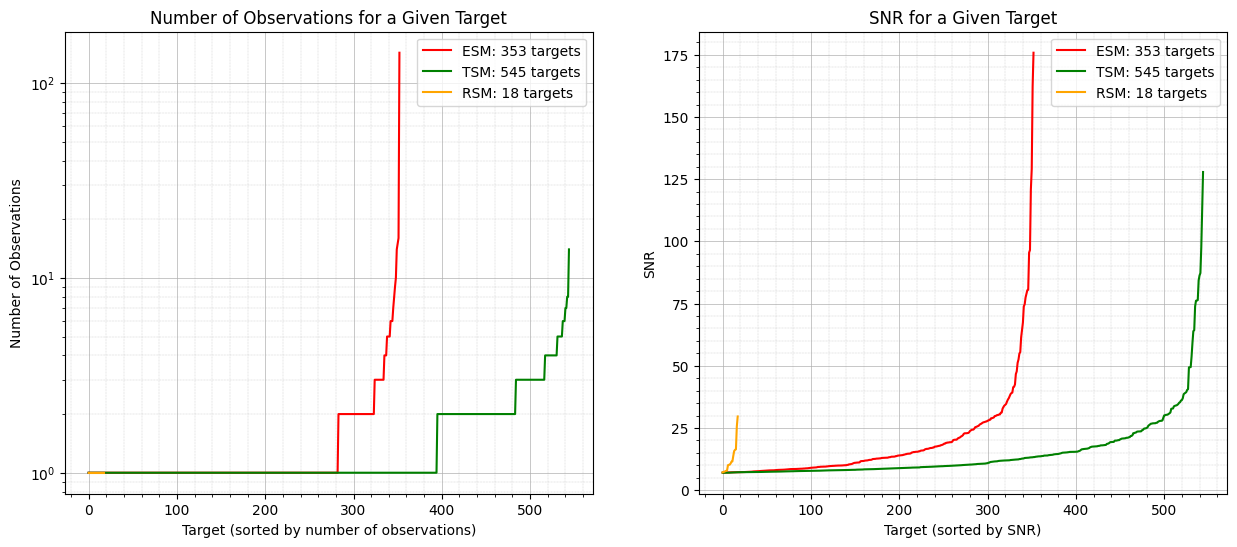

In [30]:
tsm_targets = target_list[target_list["Preferred Observation ExoEcho"].str.contains("Transmission")]
esm_targets = target_list[target_list["Preferred Observation ExoEcho"].str.contains("Emission")]
rsm_targets = target_list[target_list["Preferred Observation ExoEcho"].str.contains("Reflected Light")]

fig, (ax, ax1) = plt.subplots(1,2,figsize=(15,6))

ax.plot(range(0, len(esm_targets)), esm_targets["Tier 1 Observations ESM"].sort_values(), label=f"ESM: {esm_targets.shape[0]} targets", color=esm_colour)
ax.plot(range(0, len(tsm_targets)), tsm_targets["Tier 1 Observations TSM"].sort_values(), label=f"TSM: {tsm_targets.shape[0]} targets", color=tsm_colour)
ax.plot(range(0, len(rsm_targets)), rsm_targets["Tier 1 Observations RSM"].sort_values(), label=f"RSM: {rsm_targets.shape[0]} targets", color=rsm_colour)

ax.set_ylabel("Number of Observations")
ax.set_xlabel("Target (sorted by number of observations)")

ax.set_yscale('log')
ax.set_title("Number of Observations for a Given Target")

# ax.set_xlim(0, 1000)

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle='-.', linewidth='0.2')
ax.minorticks_on()

ax.legend()


####-----#####
ax1.plot(range(0, len(esm_targets)), esm_targets["Tier 1 SNR ESM"].sort_values(), label=f"ESM: {esm_targets.shape[0]} targets", color=esm_colour)
ax1.plot(range(0, len(tsm_targets)), tsm_targets["Tier 1 SNR TSM"].sort_values(), label=f"TSM: {tsm_targets.shape[0]} targets", color=tsm_colour) 
ax1.plot(range(0, len(rsm_targets)), rsm_targets["Tier 1 SNR RSM"].sort_values(), label=f"RSM: {rsm_targets.shape[0]} targets", color=rsm_colour) 

# labels
ax1.set_ylabel("SNR")
ax1.set_xlabel("Target (sorted by SNR)")

# ax1.set_yscale('log')
ax1.set_title("SNR for a Given Target")

# ax1.set_xlim(0, 1000)

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5')
ax1.grid(which='minor', linestyle='-.', linewidth='0.2')
ax1.minorticks_on()

ax1.legend()

plt.savefig("Results Plots/num_obs_snr_lowestObservations.png", bbox_inches='tight', dpi=300)

plt.show()

In [12]:
## Now only allowing one method to be chosen per target

limited_target_list = target_list.copy()

limited_target_list["Preferred Observation ExoEcho"] = None
limited_target_list["Required Observation Time Tier 1 [hrs]"] = None
limited_target_list["Required Observation Time Tier 2 [hrs]"] = None
limited_target_list["Required Observation Time Tier 3 [hrs]"] = None

for i, _ in limited_target_list.iterrows():
    preferred_method = ["ESM", limited_target_list['Tier 1 Observations ESM'].iloc[i], limited_target_list['Tier 1 SNR ESM'].iloc[i]]
    for param in ["TSM", "RSM"]:
        num_observations = limited_target_list[f"Tier 1 Observations {param}"].iloc[i]
        snr = limited_target_list[f"Tier 1 SNR {param}"].iloc[i]
        if num_observations < preferred_method[1]:
            preferred_method = [param, num_observations, limited_target_list[f"Tier 1 SNR {param}"].iloc[i]]
        elif num_observations == preferred_method[1]:
            if snr > preferred_method[2]:
                preferred_method = [param, num_observations, snr] # if snr == preferred_method[2], then it chooses emission by default
            
    limited_target_list["Preferred Observation ExoEcho"].iloc[i] = preferred_method[0].replace("ESM", "Emission").replace("TSM", "Transmission").replace("RSM", "Reflected Light")
    limited_target_list["Required Observation Time Tier 1 [hrs]"].iloc[i] = 3 * limited_target_list["Transit Duration [hrs]"].iloc[i] * limited_target_list[f"Tier 1 Observations {preferred_method[0]}"].iloc[i]
    limited_target_list["Required Observation Time Tier 2 [hrs]"].iloc[i] = 3 * limited_target_list["Transit Duration [hrs]"].iloc[i] * limited_target_list[f"Tier 2 Observations {preferred_method[0]}"].iloc[i]
    limited_target_list["Required Observation Time Tier 3 [hrs]"].iloc[i] = 3 * limited_target_list["Transit Duration [hrs]"].iloc[i] * limited_target_list[f"Tier 3 Observations {preferred_method[0]}"].iloc[i]

limited_target_list.head(10)

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 3 Observations TSM,Tier 3 SNR TSM,Tier 3 Observations RSM,Tier 3 SNR RSM,Tier 3 Observations Full Phase Curve SNR,Tier 3 SNR Full Phase Curve SNR,Preferred Observation ExoEcho,Required Observation Time Tier 1 [hrs],Required Observation Time Tier 2 [hrs],Required Observation Time Tier 3 [hrs]
0,TOI-5704,0.73,-0.08,0.08,4590.0,-126.0,126.0,0.76,-0.06,0.06,...,43.0,7.054779,5906.0,7.000410,440.0,10.008655,Transmission,NaN,NaN,NaN
1,TOI-672,0.54,-0.02,0.02,3765.0,-65.0,65.0,0.54,-0.02,0.02,...,7.0,7.041787,1835.0,7.000134,205.0,10.005534,Transmission,NaN,NaN,NaN
2,TOI-199,0.94,-0.01,0.00,5255.0,-10.0,12.0,0.82,0.00,0.00,...,12.0,7.180927,683528.0,7.000004,6362.0,10.000613,Transmission,NaN,NaN,NaN
3,WASP-176,1.34,-0.13,0.08,5941.0,-79.0,77.0,1.93,-0.04,0.05,...,26.0,7.033892,33.0,7.064594,5.0,10.914782,Emission,15.4584,123.6672,231.876
4,TOI-1801,0.56,-0.04,0.04,3863.0,-77.0,77.0,0.55,-0.02,0.03,...,33.0,7.053460,216907.0,7.000002,12912.0,10.000107,Transmission,NaN,NaN,NaN
5,TOI-836,0.68,-0.04,0.05,4552.0,-154.0,154.0,0.67,-0.01,0.01,...,16.0,7.024273,25526.0,7.000028,695.0,10.002546,Transmission,7.458,59.664,119.328
6,TOI-3807,1.18,-0.09,0.06,5772.0,-80.0,84.0,1.47,-0.04,0.04,...,24.0,7.103097,27.0,7.113029,2.0,10.904770,Emission,5.34,32.04,64.08
7,TOI-4087,1.18,-0.04,0.04,6060.0,-67.0,74.0,1.11,-0.02,0.02,...,20.0,7.171807,61.0,7.027049,4.0,10.174087,Emission,8.9526,89.526,170.0994
8,TOI-2818,0.98,-0.05,0.06,5721.0,-83.0,88.0,1.23,-0.03,0.03,...,9.0,7.037743,41.0,7.083156,3.0,10.401535,Transmission,11.412,57.06,102.708
9,TOI-3235,0.39,-0.02,0.02,3388.8,-68.0,68.0,0.37,-0.02,0.02,...,9.0,7.323955,189.0,7.004991,18.0,10.137399,Transmission,4.44,17.76,39.96


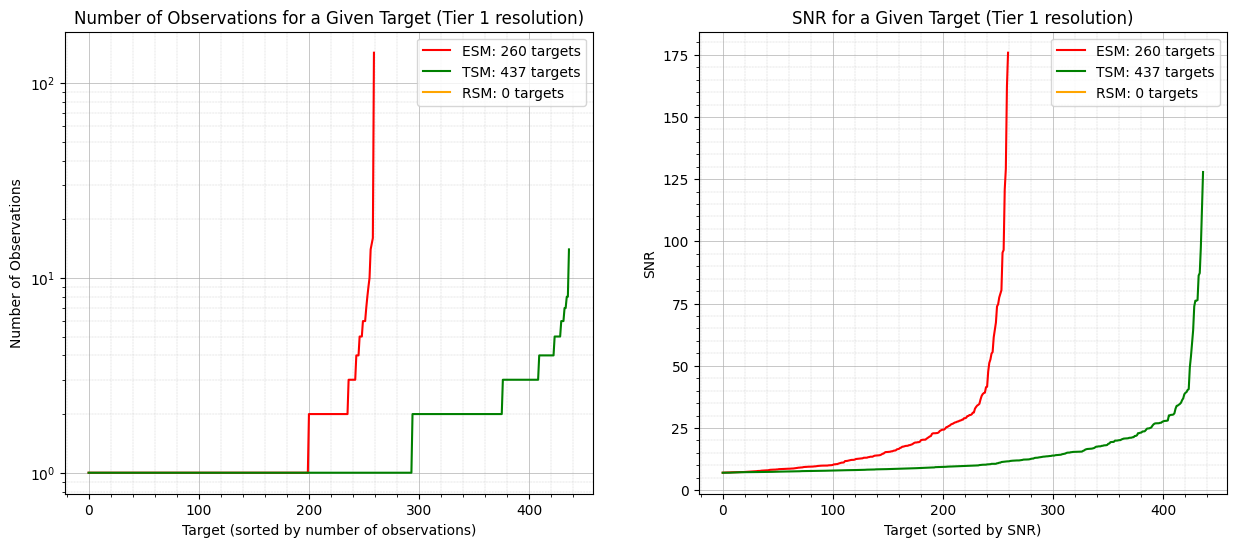

In [13]:
limited_tsm_targets = limited_target_list[limited_target_list["Preferred Observation ExoEcho"].str.contains("Transmission")]
limited_esm_targets = limited_target_list[limited_target_list["Preferred Observation ExoEcho"].str.contains("Emission")]
limited_rsm_targets = limited_target_list[limited_target_list["Preferred Observation ExoEcho"].str.contains("Reflected Light")]

fig, (ax, ax1) = plt.subplots(1,2,figsize=(15,6))

ax.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 1 Observations ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 1 Observations TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour)
ax.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 1 Observations RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour)

ax.set_ylabel("Number of Observations")
ax.set_xlabel("Target (sorted by number of observations)")

ax.set_yscale('log')
ax.set_title("Number of Observations for a Given Target (Tier 1 resolution)")

# ax.set_xlim(0, 1000)

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle='-.', linewidth='0.2')
ax.minorticks_on()

ax.legend()


####-----#####
ax1.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 1 SNR ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax1.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 1 SNR TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour) 
ax1.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 1 SNR RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour) 

ax1.set_ylabel("SNR")
ax1.set_xlabel("Target (sorted by SNR)")

# ax1.set_yscale('log')
ax1.set_title("SNR for a Given Target (Tier 1 resolution)")

# ax1.set_xlim(0, 1000)

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5')
ax1.grid(which='minor', linestyle='-.', linewidth='0.2')
ax1.minorticks_on()

ax1.legend()

plt.savefig("Results Plots/num_obs_snr_LimitedMethods_Tier1.png", bbox_inches='tight', dpi=300)

plt.show()

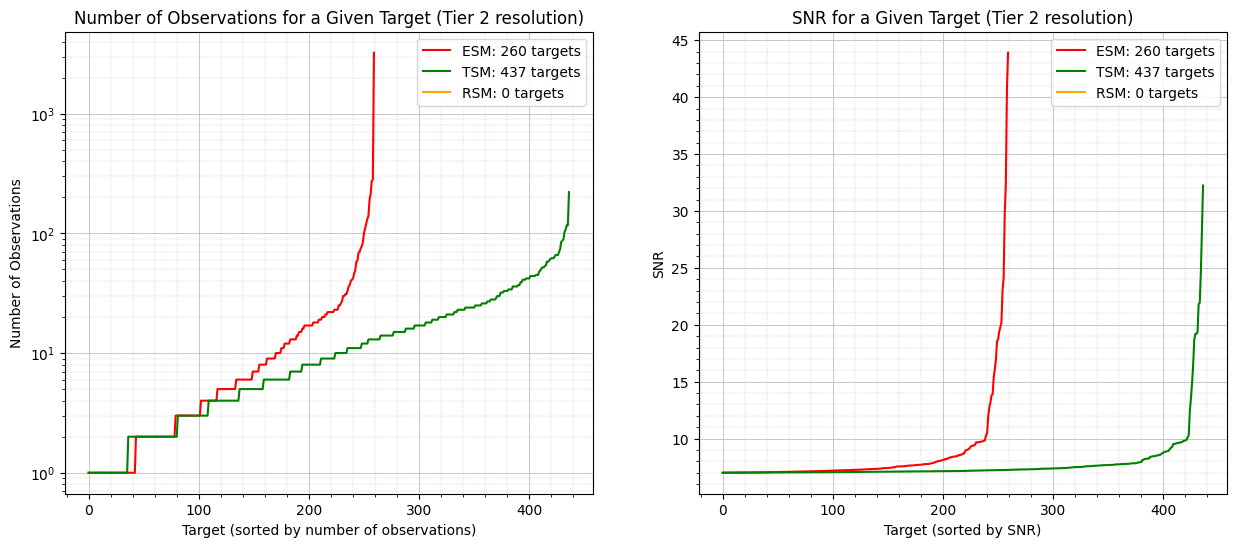

In [14]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(15,6))

ax.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 2 Observations ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 2 Observations TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour)
ax.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 2 Observations RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour)

ax.set_ylabel("Number of Observations")
ax.set_xlabel("Target (sorted by number of observations)")

ax.set_yscale('log')
ax.set_title("Number of Observations for a Given Target (Tier 2 resolution)")

# ax.set_xlim(0, 1000)

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle='-.', linewidth='0.2')
ax.minorticks_on()

ax.legend()


####-----#####
ax1.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 2 SNR ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax1.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 2 SNR TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour) 
ax1.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 2 SNR RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour) 

ax1.set_ylabel("SNR")
ax1.set_xlabel("Target (sorted by SNR)")

# ax1.set_yscale('log')
ax1.set_title("SNR for a Given Target (Tier 2 resolution)")

# ax1.set_xlim(0, 1000)

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5')
ax1.grid(which='minor', linestyle='-.', linewidth='0.2')
ax1.minorticks_on()

ax1.legend()

plt.savefig("Results Plots/num_obs_snr_LimitedMethods_Tier2.png", bbox_inches='tight', dpi=300)

plt.show()

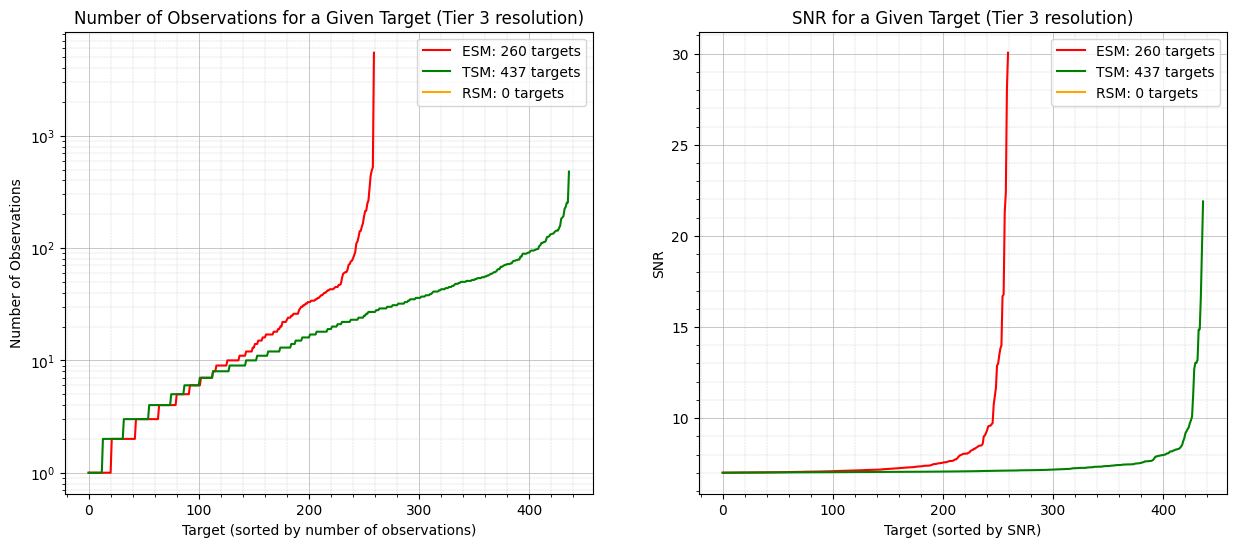

In [15]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(15,6))

ax.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 3 Observations ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 3 Observations TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour)
ax.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 3 Observations RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour)

ax.set_ylabel("Number of Observations")
ax.set_xlabel("Target (sorted by number of observations)")

ax.set_yscale('log')
ax.set_title("Number of Observations for a Given Target (Tier 3 resolution)")

# ax.set_xlim(0, 1000)

# grid
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle='-.', linewidth='0.2')
ax.minorticks_on()

ax.legend()


####-----#####
ax1.plot(range(0, len(limited_esm_targets)), limited_esm_targets["Tier 3 SNR ESM"].sort_values(), label=f"ESM: {limited_esm_targets.shape[0]} targets", color=esm_colour)
ax1.plot(range(0, len(limited_tsm_targets)), limited_tsm_targets["Tier 3 SNR TSM"].sort_values(), label=f"TSM: {limited_tsm_targets.shape[0]} targets", color=tsm_colour) 
ax1.plot(range(0, len(limited_rsm_targets)), limited_rsm_targets["Tier 3 SNR RSM"].sort_values(), label=f"RSM: {limited_rsm_targets.shape[0]} targets", color=rsm_colour) 

ax1.set_ylabel("SNR")
ax1.set_xlabel("Target (sorted by SNR)")

# ax1.set_yscale('log')
ax1.set_title("SNR for a Given Target (Tier 3 resolution)")

# ax1.set_xlim(0, 1000)

# grid
ax1.grid(which='major', linestyle='-', linewidth='0.5')
ax1.grid(which='minor', linestyle='-.', linewidth='0.2')
ax1.minorticks_on()

ax1.legend()

plt.savefig("Results Plots/num_obs_snr_LimitedMethods_Tier3.png", bbox_inches='tight', dpi=300)

plt.show()

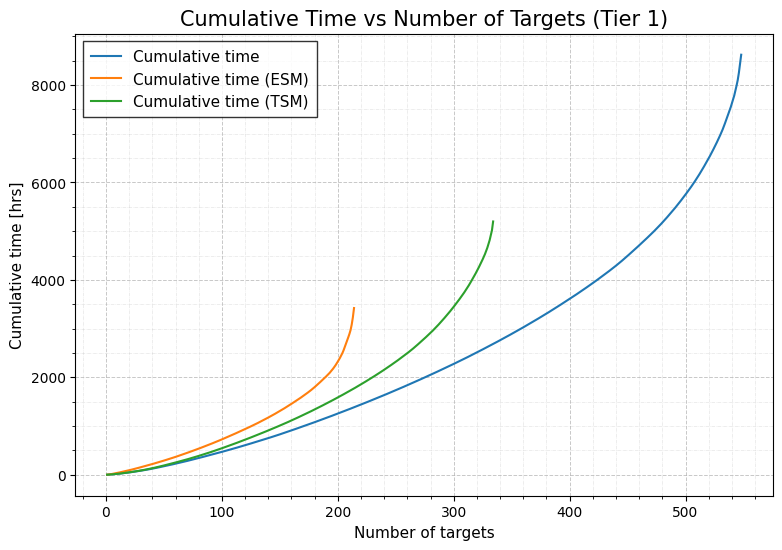

In [16]:
# sorting tier 1 observations
sorted_targets = limited_target_list.sort_values("Required Observation Time Tier 1 [hrs]", ascending=True)
sorted_esm = limited_esm_targets.sort_values("Required Observation Time Tier 1 [hrs]", ascending=True)
sorted_tsm = limited_tsm_targets.sort_values("Required Observation Time Tier 1 [hrs]", ascending=True)

# cumulative time plot
fig, ax = plt.subplots(figsize=(9,6))

# plotting
plot = ax.plot(range(1, len(sorted_targets)+1), sorted_targets["Required Observation Time Tier 1 [hrs]"].cumsum(), label="Cumulative time")
ax.plot(range(1, len(sorted_esm)+1), sorted_esm["Required Observation Time Tier 1 [hrs]"].cumsum(), label="Cumulative time (ESM)")
ax.plot(range(1, len(sorted_tsm)+1), sorted_tsm["Required Observation Time Tier 1 [hrs]"].cumsum(), label="Cumulative time (TSM)")

# ax.plot(range(1, len(sorted_esm)+1), sorted_esm["Required Observation Time [hrs]"].cumsum(), label="Cumulative time (ESM)")
# ax.plot(range(1, len(sorted_tsm)+1), sorted_tsm["Required Observation Time [hrs]"].cumsum(), label="Cumulative time (TSM)")

#
# ax.axhline(24*365 * 4, linestyle="--", label="4 years")

# grid
ax.grid(which='major', linestyle='--', linewidth=.7, alpha=.7)
ax.grid(which='minor', linestyle='-.', linewidth=0.4, alpha=.4)
ax.minorticks_on()

# labels
ax.set_xlabel("Number of targets", fontsize=11)
ax.set_ylabel("Cumulative time [hrs]", fontsize=11)

# title
ax.set_title("Cumulative Time vs Number of Targets (Tier 1)", fontsize=15)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.savefig("Results Plots/Cumulative_Time_vs_Targets Tier 1.png", dpi=300, bbox_inches="tight")

plt.show()

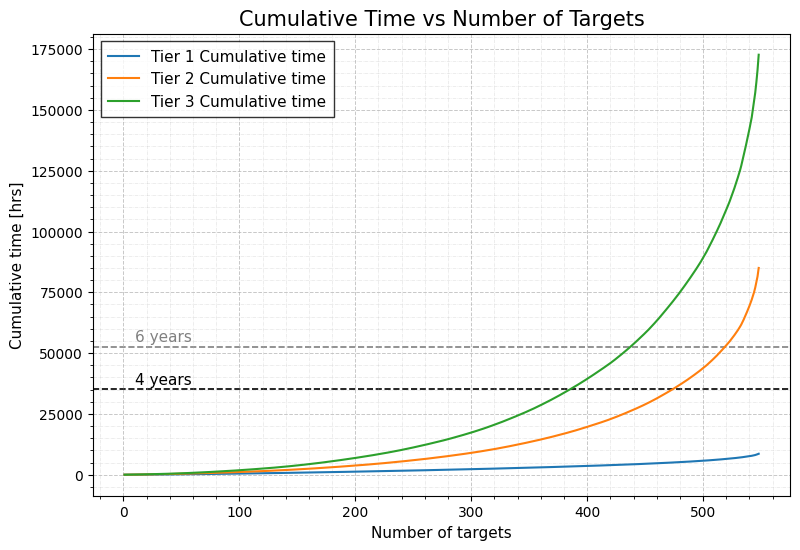

In [17]:
# sorting lists for different tiers
sorted_targets_tier1 = limited_target_list.sort_values("Required Observation Time Tier 1 [hrs]", ascending=True)
sorted_targets_tier2 = limited_target_list.sort_values("Required Observation Time Tier 2 [hrs]", ascending=True)
sorted_targets_tier3 = limited_target_list.sort_values("Required Observation Time Tier 3 [hrs]", ascending=True)

# cumulative time plot
fig, ax = plt.subplots(figsize=(9,6))

# plotting
ax.plot(range(1, len(sorted_targets)+1), sorted_targets_tier1["Required Observation Time Tier 1 [hrs]"].cumsum(), label="Tier 1 Cumulative time")
ax.plot(range(1, len(sorted_targets)+1), sorted_targets_tier2["Required Observation Time Tier 2 [hrs]"].cumsum(), label="Tier 2 Cumulative time")
ax.plot(range(1, len(sorted_targets)+1), sorted_targets_tier3["Required Observation Time Tier 3 [hrs]"].cumsum(), label="Tier 3 Cumulative time")

# ax.plot(range(1, len(sorted_esm)+1), sorted_esm["Required Observation Time [hrs]"].cumsum(), label="Cumulative time (ESM)")
# ax.plot(range(1, len(sorted_tsm)+1), sorted_tsm["Required Observation Time [hrs]"].cumsum(), label="Cumulative time (TSM)")

#
ax.axhline(24*365 * 4, linestyle="--", linewidth=1.2, color='black', zorder=0)
ax.axhline(24*365 * 6, linestyle="--", linewidth=1.2, color='gray', zorder=0)

ax.text(10, 24*365 * 4 + 1000, "4 years", fontsize=11, va='bottom', ha='left', color='black')
ax.text(10, 24*365 * 6 + 1000, "6 years", fontsize=11, va='bottom', ha='left', color='gray')

# grid
ax.grid(which='major', linestyle='--', linewidth=.7, alpha=.7)
ax.grid(which='minor', linestyle='-.', linewidth=0.4, alpha=.4)
ax.minorticks_on()

# labels
ax.set_xlabel("Number of targets", fontsize=11)
ax.set_ylabel("Cumulative time [hrs]", fontsize=11)


# title
ax.set_title("Cumulative Time vs Number of Targets", fontsize=15)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.savefig("Results Plots/Cumulative_Time_vs_Targets all Tiers.png", dpi=300, bbox_inches="tight")

plt.show()

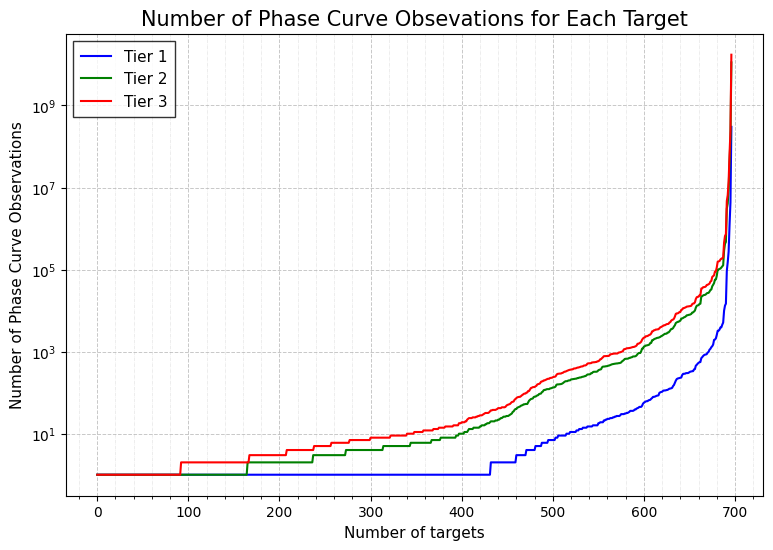

In [18]:
# Checking phase curves

# sorting lists for different tiers
sorted_phase_curves1 = target_list.sort_values("Tier 1 Observations Full Phase Curve SNR", ascending=True)
sorted_phase_curves2 = target_list.sort_values("Tier 2 Observations Full Phase Curve SNR", ascending=True)
sorted_phase_curves3 = target_list.sort_values("Tier 3 Observations Full Phase Curve SNR", ascending=True)

# sorted_targets_tier2 = limited_target_list.sort_values("Required Observation Time Tier 2 [hrs]", ascending=True)
# sorted_targets_tier3 = limited_target_list.sort_values("Required Observation Time Tier 3 [hrs]", ascending=True)

# cumulative time plot
fig, ax = plt.subplots(figsize=(9,6))

# plotting
ax.plot(range(0, len(sorted_phase_curves1)), sorted_phase_curves1["Tier 1 Observations Full Phase Curve SNR"].sort_values(), color='blue', label="Tier 1")
ax.plot(range(0, len(sorted_phase_curves2)), sorted_phase_curves2["Tier 2 Observations Full Phase Curve SNR"].sort_values(), color='green', label="Tier 2")
ax.plot(range(0, len(sorted_phase_curves3)), sorted_phase_curves3["Tier 3 Observations Full Phase Curve SNR"].sort_values(), color='red', label="Tier 3")


#
# ax.axhline(24*365 * 4, linestyle="--", linewidth=1.2, color='black', zorder=0)
# ax.axhline(24*365 * 6, linestyle="--", linewidth=1.2, color='gray', zorder=0)

# ax.text(10, 24*365 * 4 + 1000, "4 years", fontsize=11, va='bottom', ha='left', color='black')
# ax.text(10, 24*365 * 6 + 1000, "6 years", fontsize=11, va='bottom', ha='left', color='gray')

# grid
ax.grid(which='major', linestyle='--', linewidth=.7, alpha=.7)
ax.grid(which='minor', linestyle='-.', linewidth=0.4, alpha=.4)
ax.minorticks_on()

# labels
ax.set_xlabel("Number of targets", fontsize=11)
ax.set_ylabel("Number of Phase Curve Observations", fontsize=11)

ax.set_yscale('log')


# title
ax.set_title("Number of Phase Curve Obsevations for Each Target", fontsize=15)

# legend
ax.legend(fancybox=False, fontsize=11, borderpad=0.5, edgecolor="black")

plt.savefig("Results Plots/Number of Phase Curve Obsevations for Each Target.png", dpi=300, bbox_inches="tight")

plt.show()

In [19]:
pd.read_csv("Hello.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Hello.csv'

In [88]:
known = pd.read_csv("target_lists/Ariel_MCS_Known_2024-03-27.csv")
TPC = pd.read_csv("target_lists/Ariel_MCS_TPCs_2024-03-27.csv")

# making column names consistent
TPC["Transit Duration [hrs]"] = TPC["Transit Duration [hr]"]
TPC.drop("Transit Duration [hr]", axis=1, inplace=True)

# concatenate the dataframes
combined = pd.concat([TPC, known], ignore_index=True)

#
total = combined["Transit Duration [hrs]"].size
total_null = combined[combined["Transit Duration [hrs]"].isna()]["Transit Duration [hrs]"].size

known_null = known[known["Transit Duration [hrs]"].isna()]["Transit Duration [hrs]"].size
total_known = known["Transit Duration [hrs]"].size

TPC_null = TPC[TPC["Transit Duration [hrs]"].isna()]["Transit Duration [hrs]"].size
total_TPC = TPC["Transit Duration [hrs]"].size

print(f"{known_null} null values out of {total_known} total values for known dataframe")
print(f"{TPC_null} null values out of {total_TPC} total values for TPC dataframe")
print(f"{total_null} null values out of {total} total values for concatenated dataframe")

149 null values out of 697 total values for known dataframe
0 null values out of 2040 total values for TPC dataframe
149 null values out of 2737 total values for concatenated dataframe


In [14]:
ariel_airs30 = getTelescope("Ariel AIRS CH0 R=30")

ariel_airs30.target_list[ariel_airs30.target_list["Planet Name"] == "TRAPPIST-1b"]

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
28,TRAPPIST-1,0.09,0.0,0.0,2566.0,-26.0,26.0,0.12,0.0,0.0,...,18304.0,43386.0,Transit,1.0,10.0,19.0,1,0,1,2


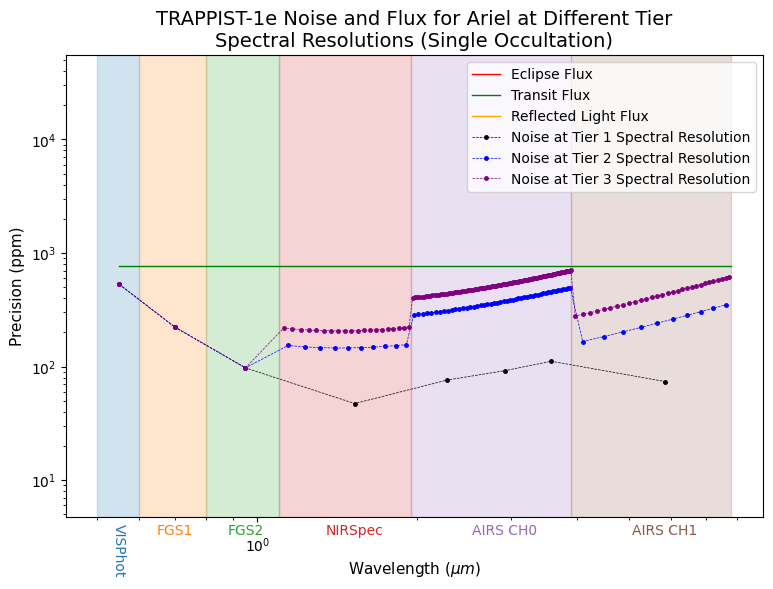

In [19]:
Ariel.plotTieredPrecisionProfile('TRAPPIST-1e')

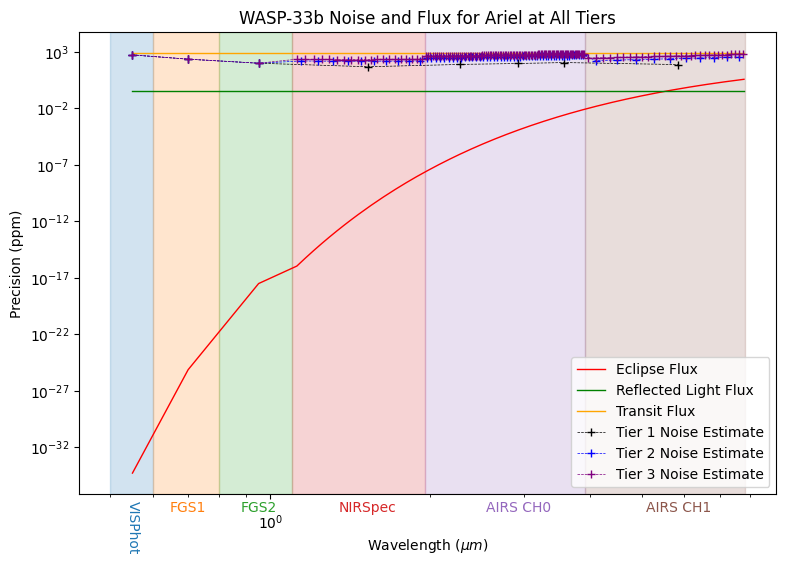

In [16]:
planet = "TRAPPIST-1e"

fig, ax = plt.subplots(figsize=(9,6))

ax.set_xscale('log')
ax.set_yscale('log')

# Plotting 
instruments = ["VISPhot", "FGS1", "FGS2", "NIRSpec R=20", "AIRS CH0 R=100", "AIRS CH1 R=100"]
Ariel.plotParamProfile(planet, instruments, "Eclipse Flux", linestyle='-', linewidth=1, marker='', ax=ax, color='red', label='Eclipse Flux')
Ariel.plotParamProfile(planet, instruments, "Reflected Light Flux", linestyle='-', linewidth=1, marker='', ax=ax, color='green', label='Reflected Light Flux')
Ariel.plotParamProfile(planet, instruments, "Transit Flux", linestyle='-', linewidth=1, marker='', ax=ax, color='orange', label='Transit Flux')

Ariel.plotParamProfile(planet, "tier 1", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax, color='black', label='Tier 1 Noise Estimate')
Ariel.plotParamProfile(planet, "tier 2", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax, color='blue', label='Tier 2 Noise Estimate')
Ariel.plotParamProfile(planet, "tier 3", "Noise Estimate", linestyle='--', linewidth=.5, marker='+', ax=ax, color='purple', label='Tier 3 Noise Estimate')

Ariel.plotSensitivityRange(ax=ax)

# legend
ax.legend(loc='best')

# title
ax.set_title("WASP-33b Noise and Flux for Ariel at All Tiers")

# labels
ax.set_xlabel("Wavelength ($\mu m$)")
ax.set_ylabel("Precision (ppm)")

# setting x-tick label padding
ax.tick_params(axis='x', pad=10)

# plt.savefig()

plt.show()

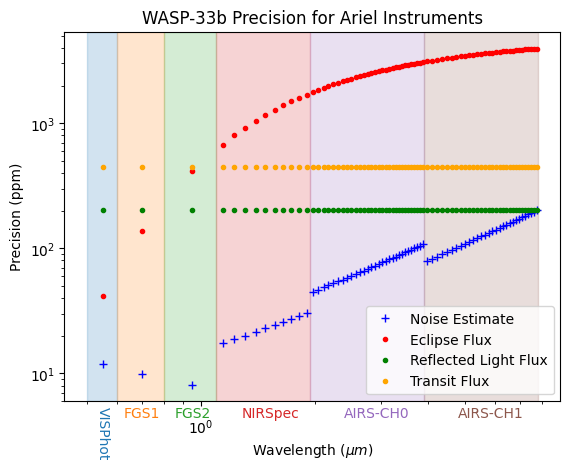

In [ ]:
planet = "WASP-33b"

fig, ax[0,0] = plt.subplots()

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

instruments = ["VISPhot", "FGS1", "FGS2", "NIRSpec R=10", "AIRS-CH0 R=30", "AIRS-CH1 R=30"]

Ariel.plotParamProfile(instruments, 
                       planet, "Noise Estimate", ax=ax[0,0], color='b', marker='+', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Eclipse Flux", ax=ax[0,0], color='r', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Reflected Light Flux", ax=ax[0,0], color='g', linestyle='')

Ariel.plotParamProfile(instruments, 
                       planet, "Transit Flux", ax=ax[0,0], color='orange', linestyle='')



# Ariel.plotParamProfile(["VISPhot", "FGS1", "FGS2", "NIRSpec", "AIRS-CH0 R=30", "AIRS-CH1 R=30"], 
#                        planet, "ESM", ax=ax, color='b', marker='.')

# Ariel.plotParamProfile(["VISPhot", "FGS1", "FGS2", "NIRSpec", "AIRS-CH0 R=30", "AIRS-CH1 R=30"],
#                         planet, "RSM", ax=ax, marker='.', color='r')

Ariel.plotSensitivityRange(instruments, 
                           fig=fig, ax=ax[0,0])

ax[0,0].tick_params(axis='x', pad=8)

# setting title
title = f"{planet} Precision for Ariel Instruments"
ax[0,0].set_title(title)

# ax.legend(loc=(1.02, 0.3))
ax[0,0].legend(loc='best')


ax[0,0].set_xlabel("Wavelength ($\mu m$)")
# ax.set_ylabel("Signal-to-noise ratio (SNR)")
ax[0,0].set_ylabel("Precision (ppm)")

plt.savefig("Precision plots/" + title, bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
# test import

ArielNirspec_imported = getTelescope("Ariel Nirspec")

ArielNirspec_imported.table[ArielNirspec_imported.table["Planet Name"] == "WASP-33b"]

,Planet Name,Eclipse Flux Ratio 1.1-1.1566667um,Eclipse Flux Ratio 1.1566667-1.2133333um,Eclipse Flux Ratio 1.2133333-1.27um,Eclipse Flux Ratio 1.27-1.3266667um,Eclipse Flux Ratio 1.3266667-1.3833333um,Eclipse Flux Ratio 1.3833333-1.44um,Eclipse Flux Ratio 1.44-1.4966667um,Eclipse Flux Ratio 1.4966667-1.5533333um,Eclipse Flux Ratio 1.5533333-1.61um,...,ESM Estimate 1.3833333-1.44um,ESM Estimate 1.44-1.4966667um,ESM Estimate 1.4966667-1.5533333um,ESM Estimate 1.5533333-1.61um,ESM Estimate 1.61-1.6666667um,ESM Estimate 1.6666667-1.7233333um,ESM Estimate 1.7233333-1.78um,ESM Estimate 1.78-1.8366667um,ESM Estimate 1.8366667-1.8933333um,ESM Estimate 1.8933333-1.95um
100,WASP-33b,0.000655,0.000736,0.000818,0.0009,0.000981,0.001061,0.00114,0.001218,0.001294,...,6.314156,6.405829,6.482415,6.545563,6.596745,6.637289,6.668392,6.691108,6.706385,6.715076


In [ ]:
ArielNirspec_imported.getParam('noise').head()

,Planet Name,Noise Estimate 1.1-1.1566667um,Noise Estimate 1.1566667-1.2133333um,Noise Estimate 1.2133333-1.27um,Noise Estimate 1.27-1.3266667um,Noise Estimate 1.3266667-1.3833333um,Noise Estimate 1.3833333-1.44um,Noise Estimate 1.44-1.4966667um,Noise Estimate 1.4966667-1.5533333um,Noise Estimate 1.5533333-1.61um,Noise Estimate 1.61-1.6666667um,Noise Estimate 1.6666667-1.7233333um,Noise Estimate 1.7233333-1.78um,Noise Estimate 1.78-1.8366667um,Noise Estimate 1.8366667-1.8933333um,Noise Estimate 1.8933333-1.95um
0,TOI-5704b,0.084144,0.084710,0.085308,0.085929,0.086570,0.087224,0.087889,0.088562,0.089240,0.089921,0.090604,0.091288,0.091971,0.092653,0.093332
1,TOI-672b,0.092267,0.092589,0.092972,0.093405,0.093878,0.094384,0.094917,0.095471,0.096043,0.096628,0.097225,0.097831,0.098444,0.099062,0.099683
2,TOI-199b,0.081369,0.082063,0.082774,0.083498,0.084230,0.084968,0.085709,0.086450,0.087192,0.087931,0.088668,0.089401,0.090130,0.090855,0.091574
3,WASP-176b,0.091642,0.092550,0.093468,0.094390,0.095313,0.096236,0.097156,0.098071,0.098981,0.099885,0.100782,0.101672,0.102554,0.103428,0.104293
4,TOI-1801b,0.074742,0.075037,0.075379,0.075759,0.076168,0.076603,0.077057,0.077527,0.078010,0.078503,0.079004,0.079511,0.080023,0.080539,0.081056


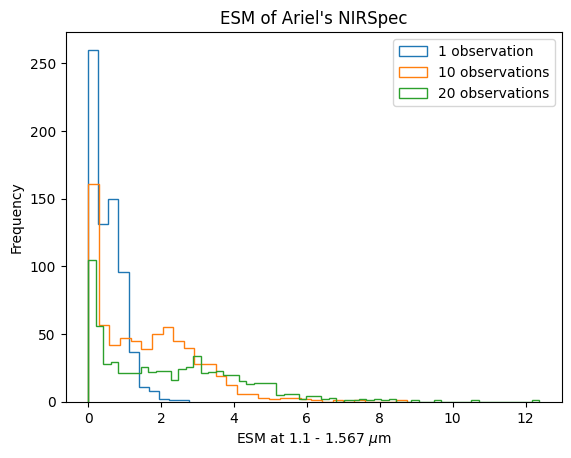

In [ ]:
iter1 = 1
iter2 = 10
iter3 = 20

esm1 = ArielNirspec_imported.getParam('esm', iterations=iter1)["ESM Estimate 1.1-1.1566667um"]
esm2 = ArielNirspec_imported.getParam('esm', iterations=iter2)["ESM Estimate 1.1-1.1566667um"]
esm3 = ArielNirspec_imported.getParam('esm', iterations=iter3)["ESM Estimate 1.1-1.1566667um"]

esm1.plot.hist(bins=10, histtype='step', label=f"{iter1} observation")
esm2.plot.hist(bins=30, histtype='step', label=f"{iter2} observations")
esm3.plot.hist(bins=60, histtype='step', label=f"{iter3} observations")
plt.legend()

plt.title("ESM of Ariel's NIRSpec")
plt.xlabel("ESM at 1.1 - 1.567 $\mu$m")

plt.show()

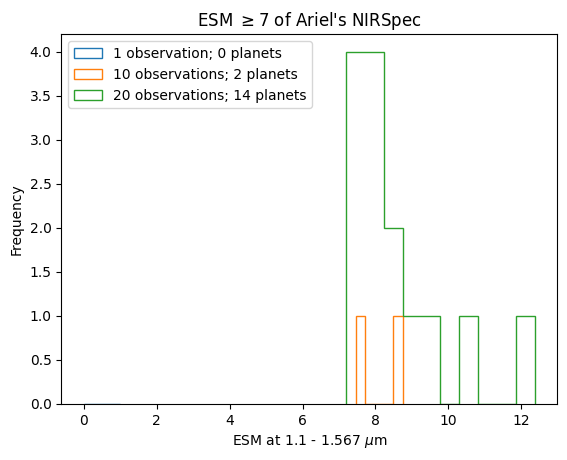

In [ ]:
iter1 = 1
iter2 = 10
iter3 = 20

num1 = esm1[esm1 >= 7].count()
num2 = esm2[esm2 >= 7].count()
num3 = esm3[esm3 >= 7].count()

esm1[esm1 >= 7].plot.hist(bins=1, histtype='step', label=f"{iter1} observation; {num1} planets")
esm2[esm2 >= 7].plot.hist(bins=5, histtype='step', label=f"{iter2} observations; {num2} planets")
esm3[esm3 >= 7].plot.hist(bins=10, histtype='step', label=f"{iter3} observations; {num3} planets")
plt.legend()

plt.title("ESM $\geq 7$ of Ariel's NIRSpec")
plt.xlabel("ESM at 1.1 - 1.567 $\mu$m")

plt.show()

In [ ]:
# "JWST/NIRSpec 0.6-1.0 um", 6.5, 0.6, 1.0, 0.30

df_known = pd.read_csv("target_lists/Ariel_MCS_Known_2024-03-27.csv")
df_tpcs = pd.read_csv("target_lists/Ariel_MCS_TPCs_2024-03-27.csv")

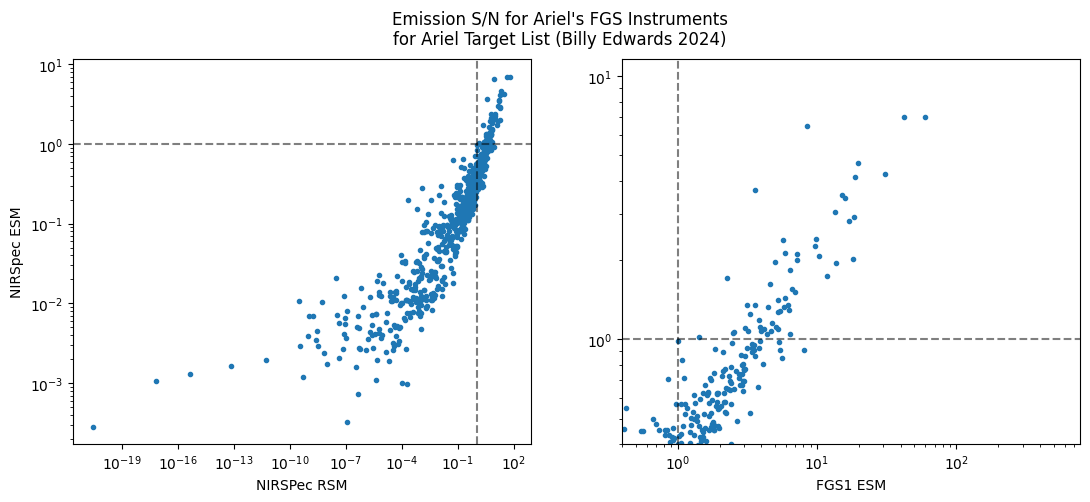

In [ ]:
# new figure for ESM
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielNirspec.getESM(1.5)['ESM Estimate 1.4966667-1.5533333um'], ArielNirspec.getRSM(1.5)['RSM Estimate 1.4966667-1.5533333um'], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("NIRSpec ESM")
ax[0,0].set_xlabel("NIRSPec RSM")

# ax 2
ax[0,1].scatter(ArielNirspec.getESM(1.5)['ESM Estimate 1.4966667-1.5533333um'], ArielNirspec.getRSM(1.5)['RSM Estimate 1.4966667-1.5533333um'], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(4e-1)
ax[0,1].set_ylim(4e-1)
ax[0,1].set_xlabel("FGS1 ESM")

# figure title
fig.suptitle("Emission S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

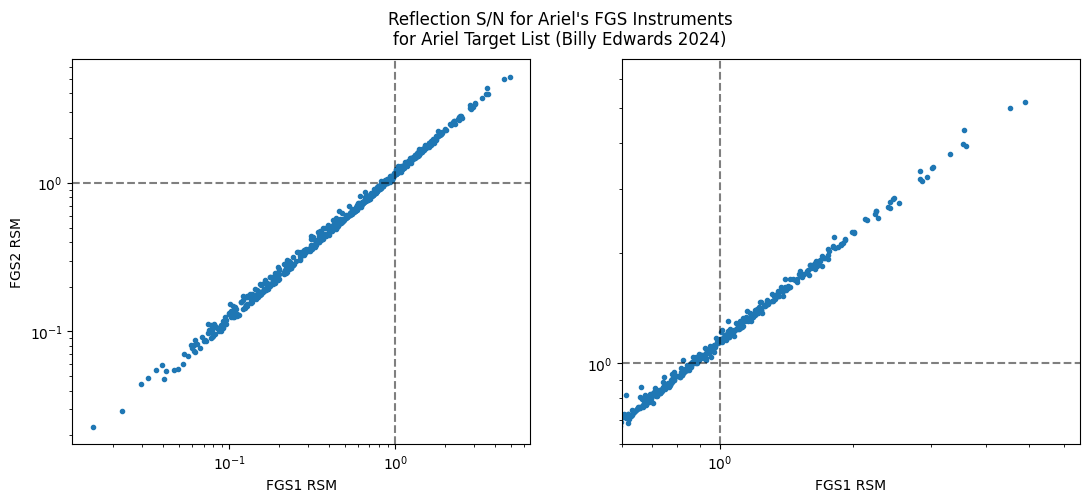

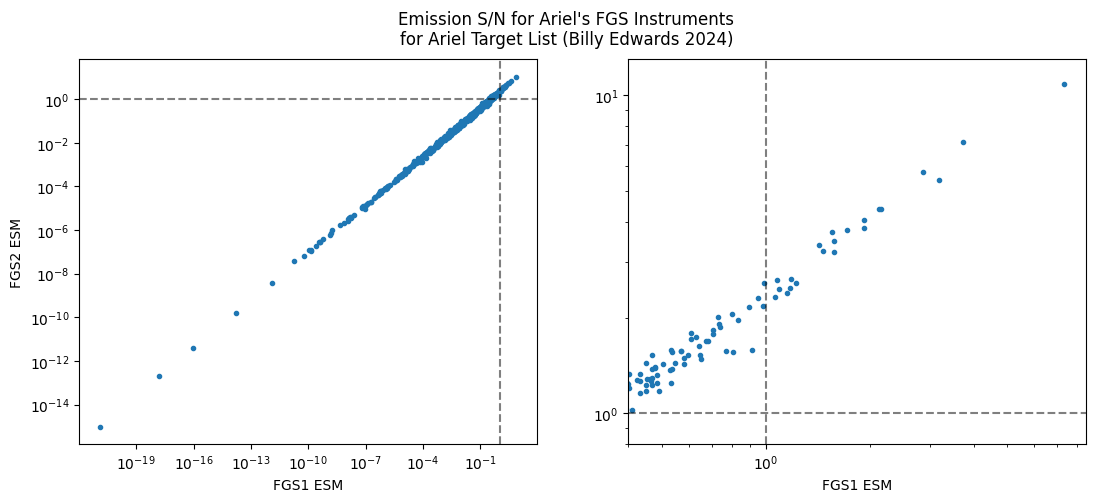

In [ ]:
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielFGS2.getRSM()[ArielFGS2.getColumns("RSM")], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("FGS2 RSM")
ax[0,0].set_xlabel("FGS1 RSM")

# ax 2
ax[0,1].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielFGS2.getRSM()[ArielFGS2.getColumns("RSM")], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(6e-1)
ax[0,1].set_ylim(6e-1)
ax[0,1].set_xlabel("FGS1 RSM")

# figure title
fig.suptitle("Reflection S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()


# new figure for ESM
fig, (ax[0,0], ax[0,1]) = plt.subplots(1,2, figsize=(13,5))

# ax 1
ax[0,0].scatter(ArielFGS1.getESM()[ArielFGS1.getColumns("ESM")], ArielFGS2.getESM()[ArielFGS2.getColumns("ESM")], marker='.')
ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel("FGS2 ESM")
ax[0,0].set_xlabel("FGS1 ESM")

# ax 2
ax[0,1].scatter(ArielFGS1.getESM()[ArielFGS1.getColumns("ESM")], ArielFGS2.getESM()[ArielFGS2.getColumns("ESM")], marker='.')
ax[0,1].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].axvline(1, linestyle="--", color='black', alpha=.5)
ax[0,1].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_xlim(4e-1, 8.5)
ax[0,1].set_ylim(8e-1, 13)
ax[0,1].set_xlabel("FGS1 ESM")

# figure title
fig.suptitle("Emission S/N for Ariel's FGS Instruments\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

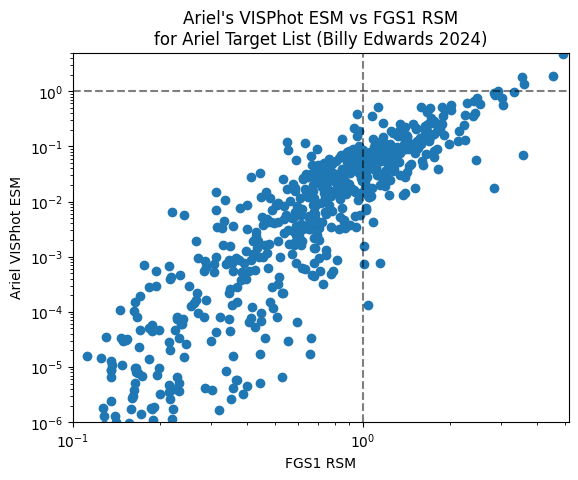

In [ ]:
fig, ax[0,0] = plt.subplots()

ax[0,0].scatter(ArielFGS1.getRSM()[ArielFGS1.getColumns("RSM")], ArielVISPhot.getESM()[ArielVISPhot.getColumns("ESM")])

ax[0,0].axhline(1, linestyle="--", color='black', alpha=.5)
ax[0,0].axvline(1, linestyle="--", color='black', alpha=.5)

ax[0,0].set_xlim(1e-1)
ax[0,0].set_ylim(1e-6)

ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')

ax[0,0].set_ylabel("Ariel VISPhot ESM")
ax[0,0].set_xlabel("FGS1 RSM")
ax[0,0].set_title("Ariel's VISPhot ESM vs FGS1 RSM\nfor Ariel Target List (Billy Edwards 2024)")

plt.show()

In [ ]:
JWSTNIRSpec = getTelescope("JWST NIRSpec 0.6-5.3um R=100")

getEclipseFluxEstimates(JWSTNIRSpec)

In [ ]:
addTelescope(df_known, "JWST NIRCam R=1600", 6.5, (2.4, 5.0), 1600, 0.36)

In [ ]:
addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=100", 6.5, (0.6, 5.3), 100, 0.36)

In [ ]:
addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=1000", 6.5, (0.6, 5.3), 1000, 0.36)

In [ ]:
# addTelescope(df_known, "JWST NIRSpec 0.6-5.3um R=2700", 6.5, (0.6, 5.3), 2700, 0.30)

In [ ]:
addTelescope(df_known,"JWST MIRI MRS 4.9-28.8um R=1500", 6.5, (4.9, 28.8), 1500, 0.18)

In [ ]:
addTelescope(df_known, "JWST MIRI LRS 5.0-12.0um R=100", 6.5, (5, 12), 100, 0.18)

In [ ]:
addTelescope(df_known, "JWST NIRISS SOSS 0.6-2.8um R=700", 6.5, (0.6, 2.8), 700, 0.2)  # http://jwst.astro.umontreal.ca/?page_id=51#:~:text=The%20SOSS%20throughput%20is%20the,with%20respect%20to%20the%20pupil.

#FOR MORE PLOTS WITH VARIOUS FILTERS: https://jwst-docs.stsci.edu/jwst-near-infrared-imager-and-slitless-spectrograph/niriss-instrumentation/niriss-filters#gsc.tab=0

In [ ]:
addTelescope(df_known, "JWST NIRSpec G395H 2.87-5.14um R=100", 6.5, (2.87, 5.14), 100, 0.4)
# For NIRSpec G395H throughput and other: https://jwst-docs.stsci.edu/jwst-near-infrared-spectrograph/nirspec-performance#gsc.tab=0
# https://jwst-docs.stsci.edu/jwst-near-infrared-spectrograph/nirspec-instrumentation/nirspec-dispersers-and-filters#gsc.tab=0

In [ ]:
addTelescope(df_known, "Ariel VISPhot 0.5-0.6um R=1", 1, (0.5, .6), 1, 0.27)
addTelescope(df_known, "Ariel FGS1 0.6-0.8um R=1", 1, (0.6, .8), 1, 0.17)
addTelescope(df_known, "Ariel FGS2 0.8-1.1um R=1", 1, (0.8, 1.10), 1, 0.25)
addTelescope(df_known, "Ariel NIRSpec 1.1-1.95um R=15", 1, (1.10, 1.95), 15, 0.27)
addTelescope(df_known, "Ariel AIRS-CH0 1.95-3.9um R=100", 1, (1.95, 3.9), 100, 0.18)
addTelescope(df_known, "Ariel AIRS-CH1 3.9-7.8um R=100", 1, (3.9, 7.8), 100, 0.18)
addTelescope(df_known, "Ariel AIRS-CH0 1.95-3.9um R=30", 1, (1.95, 3.9), 30, 0.18)
addTelescope(df_known, "Ariel AIRS-CH1 3.9-7.8um R=30", 1, (3.9, 7.8), 30, 0.18)

# See Ariel Definition of Study Report / Red Book

In [ ]:
fig, ax[0,0] = plt.subplots()

plotNoise("Telescopes/Ariel NIRSpec 1.1-1.95um R=15.csv", "Ariel NIRSpec", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH0 1.95-3.9um R=30.csv", "Ariel AIRS-CH0", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH1 3.9-7.8um R=30.csv", "Ariel AIRS-CH1", ax=ax[0,0], fill_between=True)

ax[0,0].text(1.1, 0.00019, "NIRSpec")
ax[0,0].text(1.25, 0.00000, "R=15")
ax[0,0].text(2.3, 0.00039, "AIRS-CH0")
ax[0,0].text(2.7, 0.00004, "R=30")
ax[0,0].text(5.2, 0.00065, "AIRS-CH1")
ax[0,0].text(5.7, 0.0001, "R=30")

ax[0,0].set_title("Noise Estimates for Various Ariel Instruments")

fig.savefig("Noise Estimate Plots/Noise Estimates for Various Ariel Instruments (R15 and R30).png", bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
fig, ax[0,0] = plt.subplots()



plotNoise("Telescopes/Ariel NIRSpec 1.1-1.95um R=15.csv", "Ariel NIRSpec", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH0 1.95-3.9um R=100.csv", "Ariel AIRS-CH0", ax=ax[0,0], fill_between=True)
plotNoise("Telescopes/Ariel AIRS-CH1 3.9-7.8um R=100.csv", "Ariel AIRS-CH1", ax=ax[0,0], fill_between=True)

ax[0,0].text(1.05, 0.0002, "NIRSpec")
ax[0,0].text(1.25, -0.00003, "R=15")
ax[0,0].text(2.3, 0.00071, "AIRS-CH0")
ax[0,0].text(2.7, 0.00009, "R=100")
ax[0,0].text(5.2, 0.00118, "AIRS-CH1")
ax[0,0].text(5.7, 0.00021, "R=100")

ax[0,0].set_title("Noise Estimates for Various Ariel Instruments")

fig.savefig("Noise Estimate Plots/Noise Estimates for Various Ariel Instruments (R15 and R100).png", bbox_inches='tight', dpi=300)

plt.show()